# Proyecto 1

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carga de datos (csv)
Se cargan la base de datos (CSV) para trabajar con estos

In [2]:
direccionTrain = '../apartments_for_rent_classified_10K.csv'
data_original = pd.read_csv(direccionTrain, sep=';', encoding='latin1')
data_original.shape

(10000, 22)

# 2. Entendimientos de los datos

In [3]:
data_original.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,1.000000e+04,9966.000000,9993.000000,10000.000000,10000.000000,9990.000000,9990.000000,1.000000e+04
mean,5.623396e+09,1.380544,1.744021,1486.277500,945.810500,37.695162,-94.652247,1.574891e+09
std,7.021025e+07,0.615410,0.942354,1076.507968,655.755736,5.495851,15.759805,3.762395e+06
min,5.508654e+09,1.000000,0.000000,200.000000,101.000000,21.315500,-158.022100,1.568744e+09
25%,5.509248e+09,1.000000,1.000000,949.000000,649.000000,33.679850,-101.301700,1.568781e+09
50%,5.668610e+09,1.000000,2.000000,1270.000000,802.000000,38.809800,-93.651600,1.577358e+09
75%,5.668626e+09,2.000000,2.000000,1695.000000,1100.000000,41.349800,-82.209975,1.577359e+09
max,5.668663e+09,8.500000,9.000000,52500.000000,40000.000000,61.594000,-70.191600,1.577362e+09


### 2.1 Datos Nulos

Como se puede observar El análisis muestra que varias columnas tienen valores nulos, destacando `amenities`, `pets_allowed` y `address` con una cantidad significativa. Otras columnas tienen pocos valores faltantes, mientras que la mayoría está completa, lo que facilita el análisis general.

In [4]:
features = data_original.columns
data_original[features].isnull().sum() 

id                  0
category            0
title               0
body                0
amenities        3549
bathrooms          34
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     4163
price               0
price_display       0
price_type          0
square_feet         0
address          3327
cityname           77
state              77
latitude           10
longitude          10
source              0
time                0
dtype: int64

El análisis porcentual muestra que las columnas `amenities`, `pets_allowed` y `address` tienen los mayores porcentajes de valores nulos (35.49 %, 41.63 % y 33.27 %, respectivamente). Las demás columnas tienen porcentajes insignificantes de datos faltantes, facilitando su uso para análisis más detallados.

In [5]:
data_original[features].isnull().sum() /data_original.shape[0] * 100

id                0.00
category          0.00
title             0.00
body              0.00
amenities        35.49
bathrooms         0.34
bedrooms          0.07
currency          0.00
fee               0.00
has_photo         0.00
pets_allowed     41.63
price             0.00
price_display     0.00
price_type        0.00
square_feet       0.00
address          33.27
cityname          0.77
state             0.77
latitude          0.10
longitude         0.10
source            0.00
time              0.00
dtype: float64

### 2.2 Graficas de disperción de las variables continuas

Como se puede observar en las graficas de disperción las variables square_feed muestra una relacion algo incremental pero con aleatoriedad, por otro lado, latitud y longitud muestran tambien una disperción aleatoria. Por otro lado las variables id y time muestran una dispercion similar, lo que puede ocasionar correlacion entre estos mas adelante, esto puede suceder si el id se creo con respecto al tiempo de creación, lo cual suele ser normal.

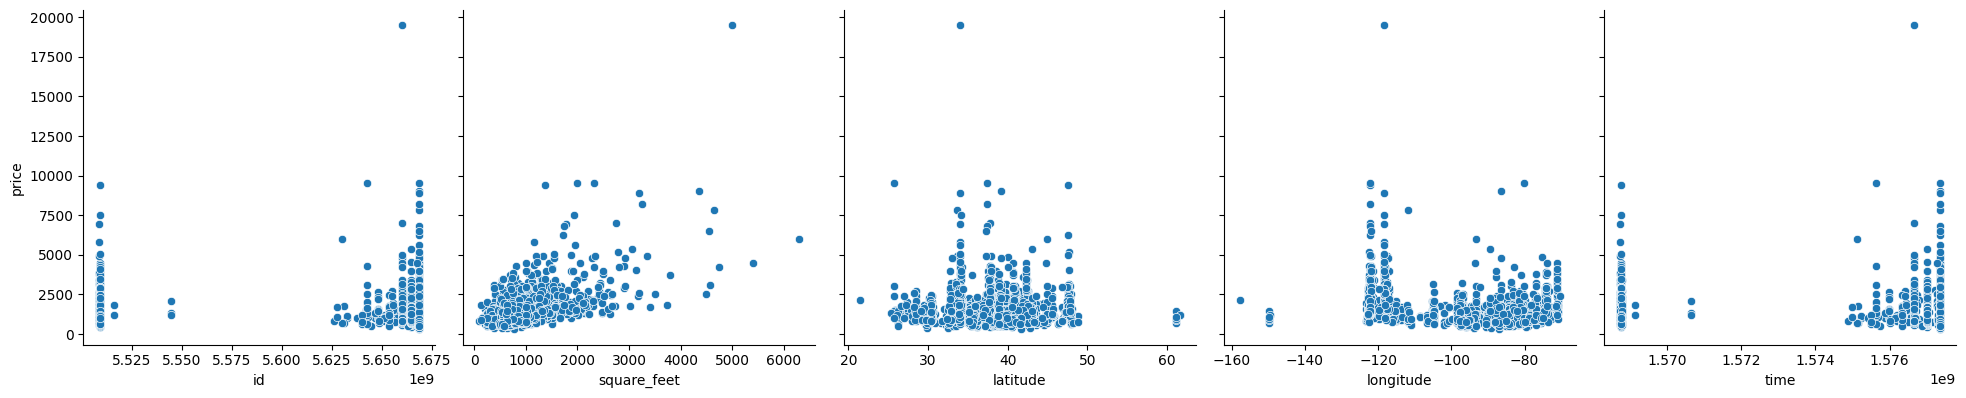

In [6]:
numerical_columns = data_original.select_dtypes(include=[np.number]).columns
numerical_columns = numerical_columns.drop(['bathrooms', 'bedrooms', 'price'])
sns.pairplot(data_original.sample(frac=0.2), height=4, y_vars="price", x_vars=numerical_columns, kind="scatter")

### 2.3 Histogramas para variables continuas

Como se puede observar en los histogramas de id y time tienen una distribucion similar con valores en extremos y no acumulados en una media. Por otro lado, el tamaño del piso muestra una distribucion acumulada en una media de 945, sin embargo, tiene valores extremos que pueden alterar su grafica ya que tiene un valor maximo de 40000 que puede ser un outlier. Por ultimo, la distribución de latitud y longitud muestran una distribucion aleatorias sin rasgos fuera de lo común.

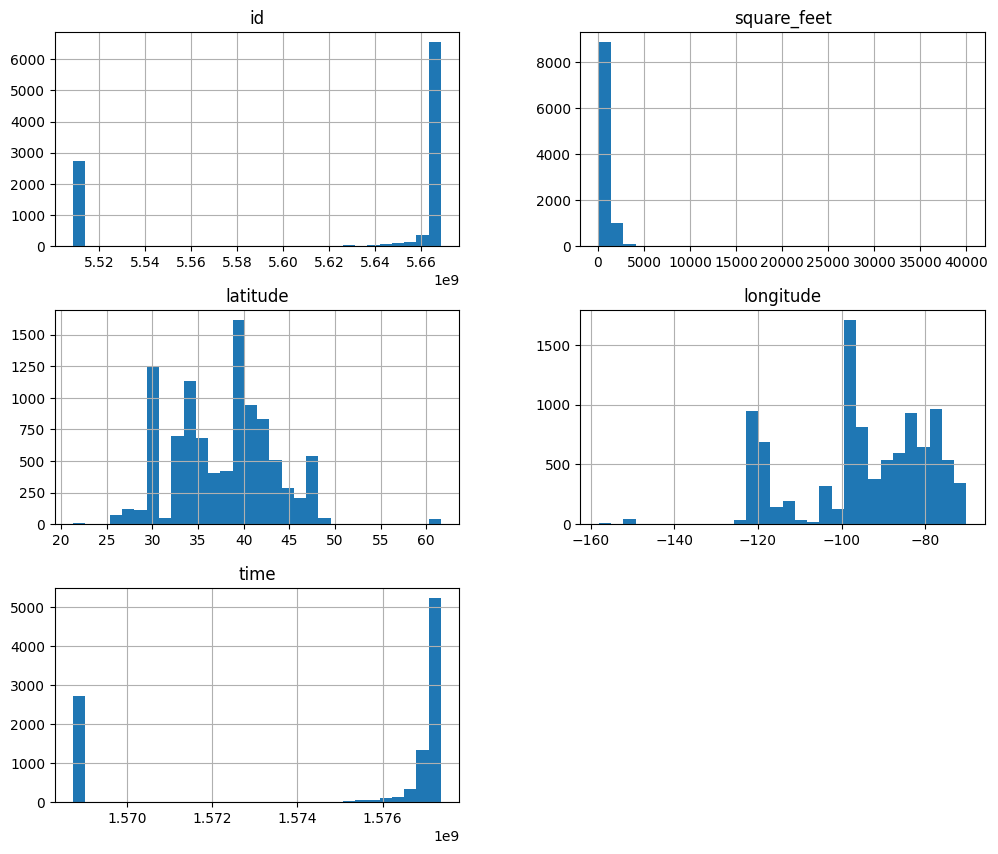

In [7]:
data_original[numerical_columns].hist(figsize=(12, 10), bins=30)
plt.show()

In [8]:
print(data_original[numerical_columns].describe())

                 id   square_feet     latitude    longitude          time
count  1.000000e+04  10000.000000  9990.000000  9990.000000  1.000000e+04
mean   5.623396e+09    945.810500    37.695162   -94.652247  1.574891e+09
std    7.021025e+07    655.755736     5.495851    15.759805  3.762395e+06
min    5.508654e+09    101.000000    21.315500  -158.022100  1.568744e+09
25%    5.509248e+09    649.000000    33.679850  -101.301700  1.568781e+09
50%    5.668610e+09    802.000000    38.809800   -93.651600  1.577358e+09
75%    5.668626e+09   1100.000000    41.349800   -82.209975  1.577359e+09
max    5.668663e+09  40000.000000    61.594000   -70.191600  1.577362e+09


### 2.3 BoxPlot para variables categoricas

Para graficar las variables categoricas primero se filtran los datos para obtener estas variables contando la cantidad de valores unicos por variable y filtrandola por maximo 52 valores unicos que es el mayor caso que es el del estado donde se encuentra el apartamento

In [9]:
category_counts = data_original.nunique()
categorical_columns_filtered = category_counts[category_counts < 52].index
categorical_columns_filtered

Index(['category', 'bathrooms', 'bedrooms', 'currency', 'fee', 'has_photo',
       'pets_allowed', 'price_type', 'state', 'source'],
      dtype='object')

Como se puede Observar en los BoxPLot hay algunas variables que tienen una sola categoria, por lo que estas variables son obsoletas para nuestro modelo. Por otro lado, las otras variables tienen una distribución mas aleatoria que no muestran un patron claro, sin embargo, la cantidad de baños y cuartos si muestran una relacion creciente con respecto al precio.

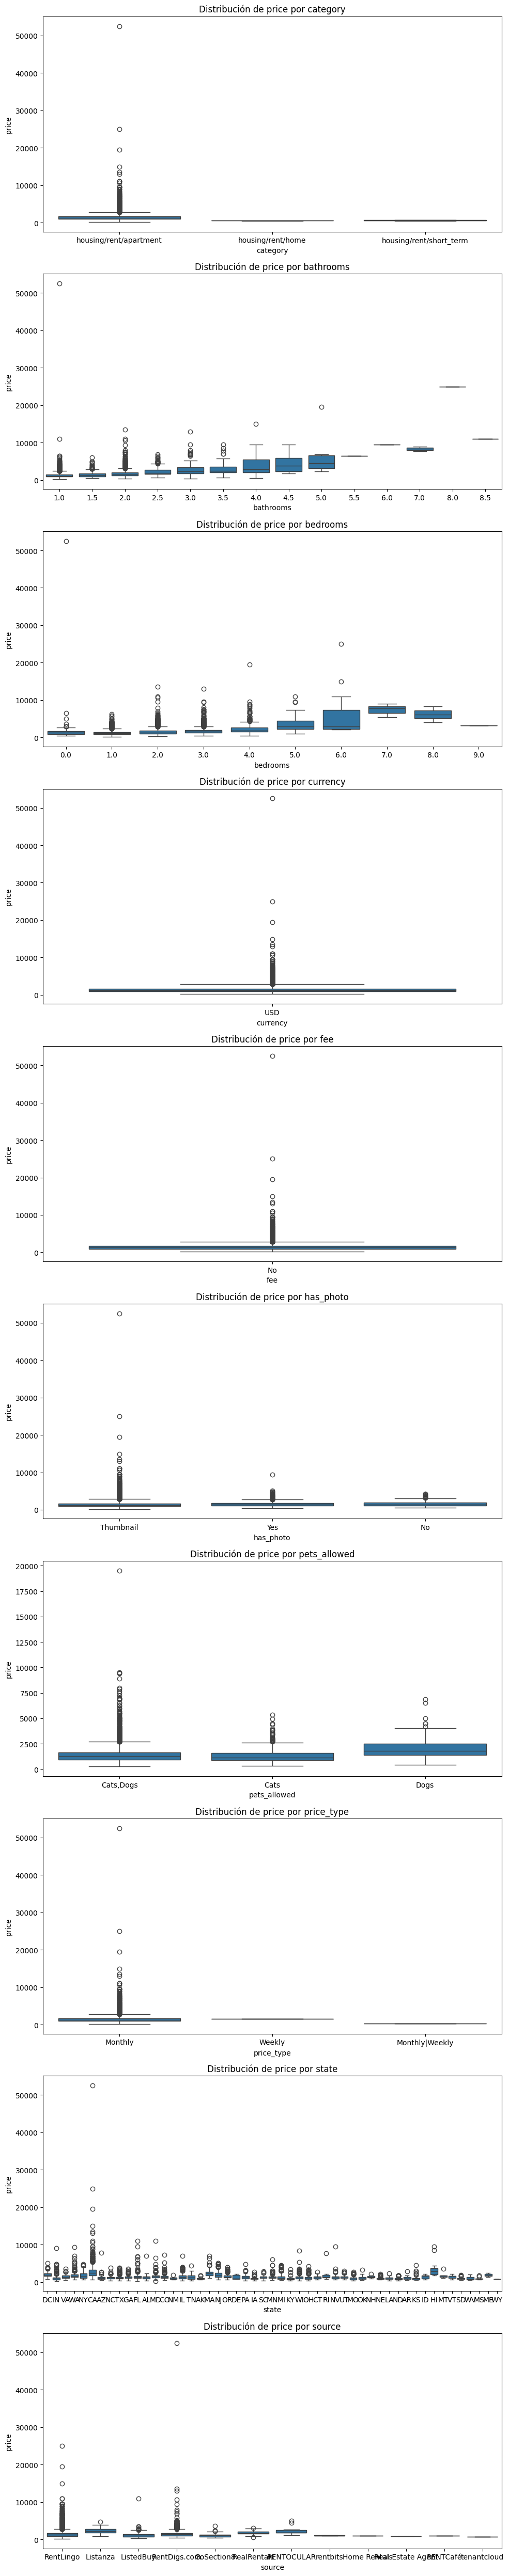

In [10]:
fig, axes = plt.subplots(nrows=len(categorical_columns_filtered), ncols=1, figsize=(10, 5 * len(categorical_columns_filtered)))

for ax, feature in zip(axes, categorical_columns_filtered):
    sns.boxplot(data=data_original, x=feature, y="price", ax=ax)
    ax.set_title(f"Distribución de price por {feature}")

plt.tight_layout()
plt.show()

# 3. Limpieza de datos

### 3.1 Selección de variables por valores unicos

Para la selección de variables, se eliminarán aquellas que son irrelevantes para los modelos, como las que contienen un único valor constante. En este caso, se retirarán las variables *currency* y *fee*, ya que no aportan información útil al análisis.

In [11]:
# Eliminar columnas con un solo valor único como es currency y fee
columns_to_drop = data_original.nunique()[data_original.nunique() == 1].index
data_filtered_1 = data_original.drop(columns=columns_to_drop)
data_filtered_1.shape

(10000, 20)

### 3.2 Selección de variables por correlación

Dado que las columnas `id` y `time` tienen una correlación perfecta (1), se decidió eliminar ambas variables. Una correlación de 1 indica que ambas contienen exactamente la misma información, lo que las hace redundantes. Además, el significado de estas variables no aporta valor al modelo: `id` es únicamente un identificador sin relevancia predictiva, y `time`, aunque representa cuándo se creó el anuncio, no es útil para estimar el precio de los apartamentos. Por lo tanto, se eliminan ambas para evitar redundancias y optimizar el conjunto de datos.

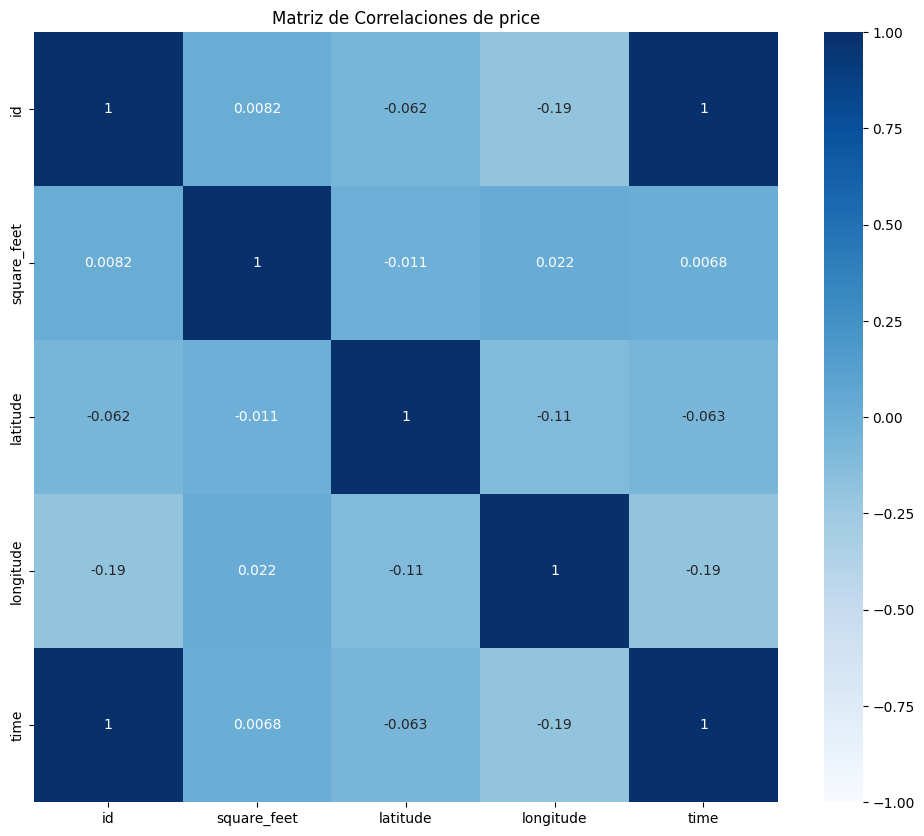

In [12]:
numerical_columns = data_original.select_dtypes(include=[np.number]).columns
numerical_columns = numerical_columns.drop(['bathrooms', 'bedrooms', 'price'])
correlation_matrix = pd.DataFrame(data_original, columns=numerical_columns).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="Blues", vmin=-1, vmax=1, annot=True)
plt.title("Matriz de Correlaciones de price")
plt.show()

In [13]:
data_filtered_2 = data_filtered_1.drop(columns=['id', 'time'])
data_filtered_2.shape

(10000, 18)

### 3.3 Selección de variables por modelo de negocio

Se decidió eliminar la columna `price_display`, ya que contiene la misma información que la columna `price`, la cual es nuestra variable objetivo en el modelo. Mantener ambas variables sería redundante y no aportaría valor adicional al análisis. Además, la presencia de `price_display` podría introducir ruido en el modelo y afectar su desempeño, ya que el modelo estaría procesando información duplicada. Por lo tanto, se prioriza conservar únicamente `price` como la representación del valor objetivo.

In [14]:
data_filtered_3 = data_filtered_2.drop(columns=['price_display'])
data_filtered_3.shape

(10000, 17)

Se decidió procesar la columna `price_type` para unificar los valores de la variable `price` en términos mensuales, ya que la mayoría de los datos ya están expresados en esta unidad. Para los registros donde `price_type` sean valores semanales, se multiplicará el `price` por 4 para convertirlos a valores mensuales. Por otro lado, se eliminarán los registros donde `price_type` tenga el valor `Monthly|Weekly`, ya que este no especifica si el precio corresponde a un mes o una semana, lo que podría introducir errores en el análisis.

In [15]:
data_filtered_4 = data_filtered_3.copy()
data_filtered_4.loc[data_filtered_4['price_type'] == 'Weekly', 'price'] *= 4

# Eliminar los registros con price_type 'Monthly|Weekly'
data_filtered_4 = data_filtered_4[data_filtered_4['price_type'] != 'Monthly|Weekly']

# Eliminar la columna price_type, ya que ya no es necesaria
data_filtered_4.drop(columns=['price_type'], inplace=True)

data_filtered_4.shape


(9999, 16)

### 3.3 Limpieza de datos por datos nulos

Para la limpieza de los datos, se decidió imputar los valores nulos de las variables **latitude** y **longitude** con la mediana, dado que la cantidad de datos faltantes es mínima y esta estrategia preserva la distribución central de las coordenadas. En el caso de **bathrooms** y **bedrooms**, se optó por completar los valores nulos con el promedio, ya que son variables numéricas. Aunque inicialmente parecen ser categóricas, al representar cantidades discretas, se pueden tratar como variables continuas y luego redondear el promedio al entero más cercano para mantener consistencia en su interpretación. Esto asegura que los datos estén completos sin introducir sesgos significativos en el análisis. Para las demas variables se hara el analisis despues.

In [16]:
data_filtered_4.isnull().sum() /data_filtered_4.shape[0] * 100
variables_con_nulos = data_filtered_4.columns[data_filtered_4.isnull().sum() > 0]
nulos_df = pd.DataFrame({
    'Cantidad de Nulos': data_filtered_4.isnull().sum()[variables_con_nulos],
    'Porcentaje de Nulos': data_filtered_4.isnull().sum()[variables_con_nulos] / data_filtered_4.shape[0] * 100,
    'Tipo de Dato': data_filtered_4.dtypes[variables_con_nulos]
})
nulos_df

,Cantidad de Nulos,Porcentaje de Nulos,Tipo de Dato
amenities,3549,35.493549,object
bathrooms,33,0.330033,float64
bedrooms,6,0.060006,float64
pets_allowed,4163,41.634163,object
address,3326,33.263326,object
cityname,77,0.770077,object
state,77,0.770077,object
latitude,10,0.100010,float64
longitude,10,0.100010,float64


Se hacen los cambios mencionados anteriormente

In [17]:
data_filtered_5 = data_filtered_4.copy()
# Rellenar valores nulos en latitude y longitude con la mediana
data_filtered_5['latitude'] = data_filtered_5['latitude'].fillna(data_filtered_5['latitude'].median())
data_filtered_5['longitude'] = data_filtered_5['longitude'].fillna(data_filtered_5['longitude'].median())

# Rellenar valores nulos en bathrooms y bedrooms con el promedio redondeado al entero más cercano
data_filtered_5['bathrooms'] = data_filtered_5['bathrooms'].fillna(round(data_filtered_5['bathrooms'].mean()))
data_filtered_5['bedrooms'] = data_filtered_5['bedrooms'].fillna(round(data_filtered_5['bedrooms'].mean()))


Para las variables categóricas cityname y state, se decidió no eliminarlas, ya que contienen información relevante para el modelo. En su lugar, se optó por rellenar los valores nulos con una categoría especial llamada "Desconocido". Esta estrategia permite conservar la estructura de las variables y manejar los casos donde no se cuenta con información, evitando la pérdida de datos importantes y permitiendo que el modelo pueda aprender de los patrones asociados a la ausencia de valores.

In [18]:
data_filtered_5['cityname'].fillna('Desconocido', inplace=True)
data_filtered_5['state'].fillna('Desconocido', inplace=True)
data_filtered_5['pets_allowed'].fillna('Desconocido', inplace=True)


# Verificar que ya no haya nulos en estas columnas
print(data_filtered_5[['cityname', 'state', 'pets_allowed']].isnull().sum())


cityname        0
state           0
pets_allowed    0
dtype: int64


C:\Users\andre\AppData\Local\Temp\ipykernel_8368\2206231234.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_filtered_5['cityname'].fillna('Desconocido', inplace=True)
C:\Users\andre\AppData\Local\Temp\ipykernel_8368\2206231234.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [19]:
data_filtered_5.head(3)

,category,title,body,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,square_feet,address,cityname,state,latitude,longitude,source
0,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,1.0,0.0,Thumbnail,Desconocido,790,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo
1,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,1.0,1.0,Thumbnail,Desconocido,425,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo
2,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,Thumbnail,Desconocido,1390,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo


### 3.4 Limpieza por Outliers

Se decidió eliminar los outliers en la variable `price`, ya que estos valores extremos pueden distorsionar los resultados del modelo y afectar su capacidad para realizar predicciones precisas. Este proceso permite centrarse en los datos más representativos y mejorar la calidad del análisis. Del mismo modo, se eliminaron los outliers de las demas variables continuas para obtener un mejor modelo sin valores extremos.

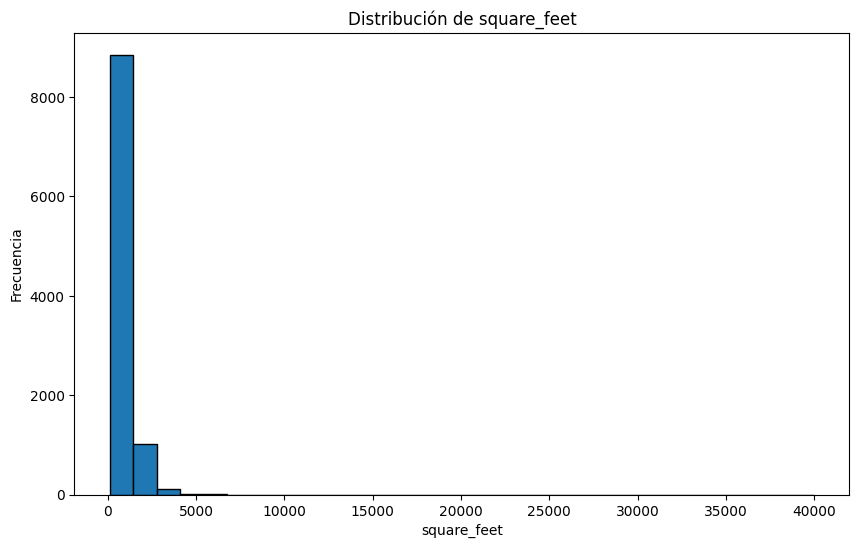

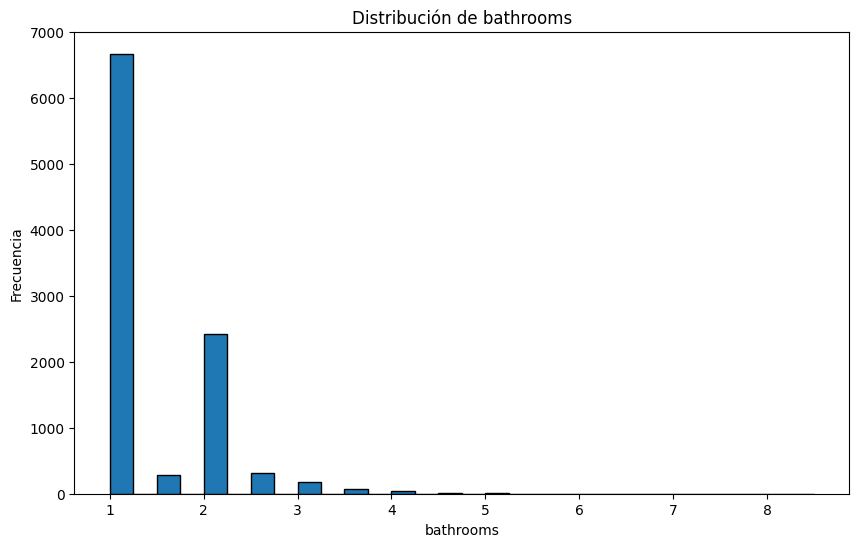

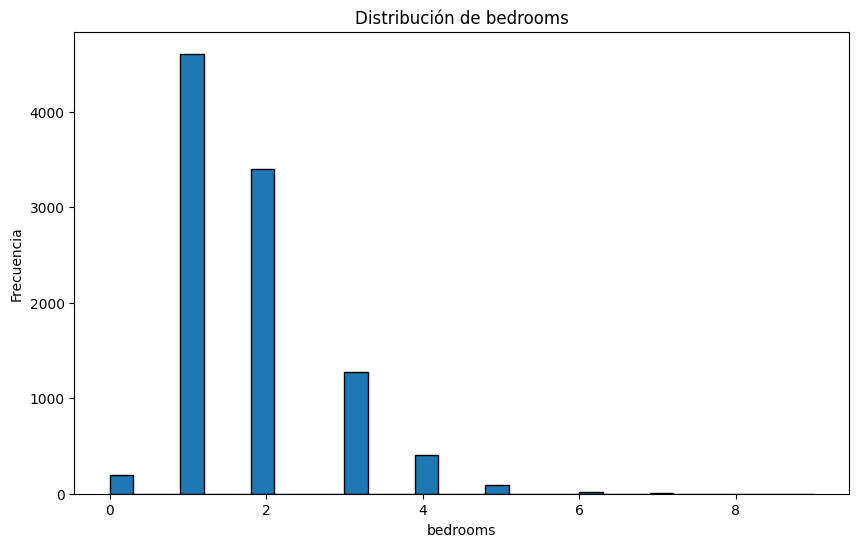

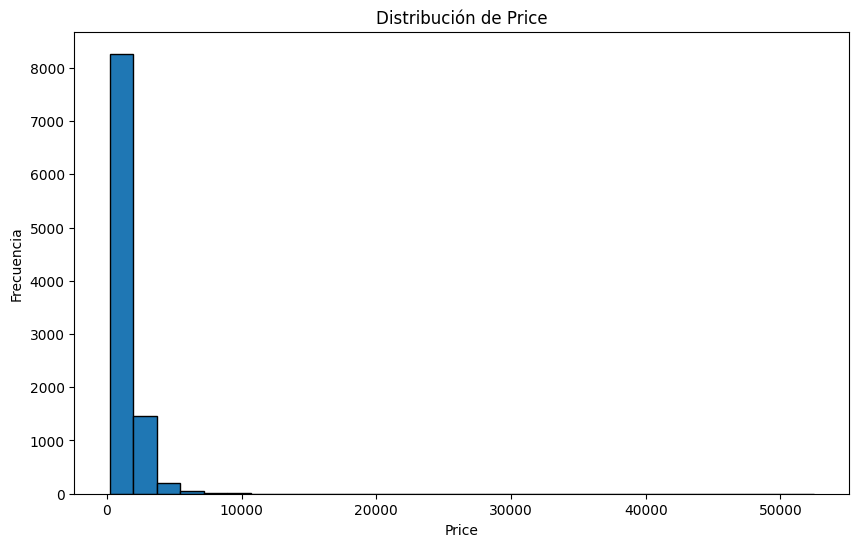

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(data_filtered_5['square_feet'], bins=30, edgecolor='k')
plt.title('Distribución de square_feet')
plt.xlabel('square_feet')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(data_filtered_5['bathrooms'], bins=30, edgecolor='k')
plt.title('Distribución de bathrooms')
plt.xlabel('bathrooms')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(data_filtered_5['bedrooms'], bins=30, edgecolor='k')
plt.title('Distribución de bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(data_filtered_5['price'], bins=30, edgecolor='k')
plt.title('Distribución de Price')
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.show()


In [21]:
data_filtered_5['price'].describe()

count     9999.000000
mean      1486.866687
std       1077.542535
min        200.000000
25%        949.000000
50%       1270.000000
75%       1695.000000
max      52500.000000
Name: price, dtype: float64

In [22]:
# Definir una función para eliminar outliers usando el método del rango intercuartílico (IQR)
def eliminar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 5 * IQR
    return df[df[columna] <= upper_bound]

data_filtered_6 = eliminar_outliers(data_filtered_5, 'price')
data_filtered_6 = eliminar_outliers(data_filtered_6, 'bedrooms')
data_filtered_6 = eliminar_outliers(data_filtered_6, 'bathrooms')
data_filtered_6 = eliminar_outliers(data_filtered_6, 'square_feet')


data_filtered_6.shape

(9888, 16)

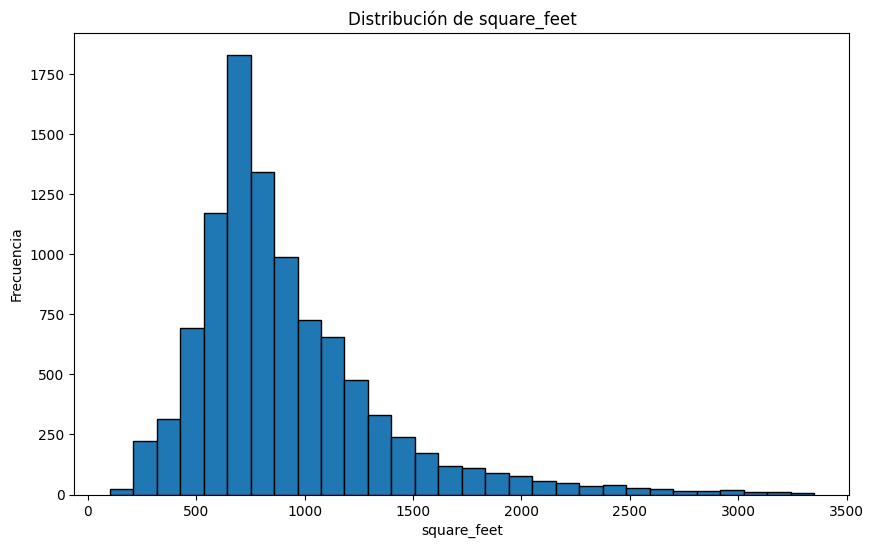

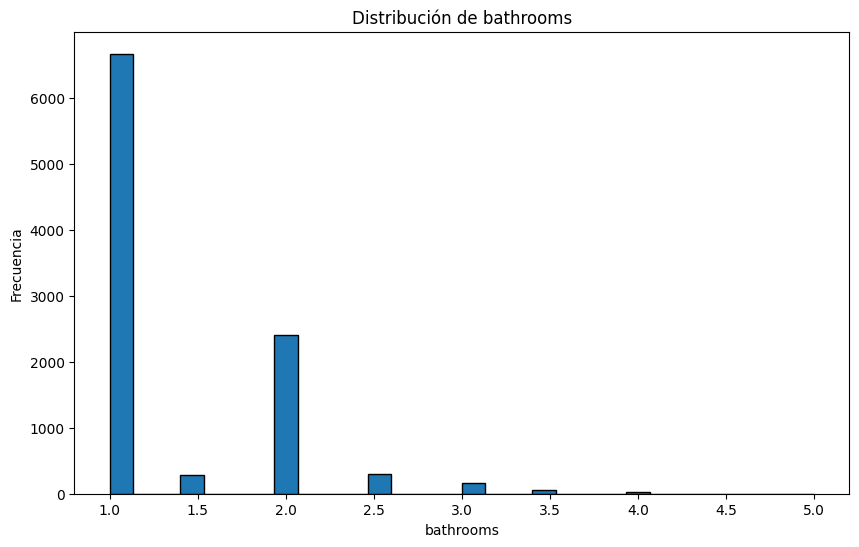

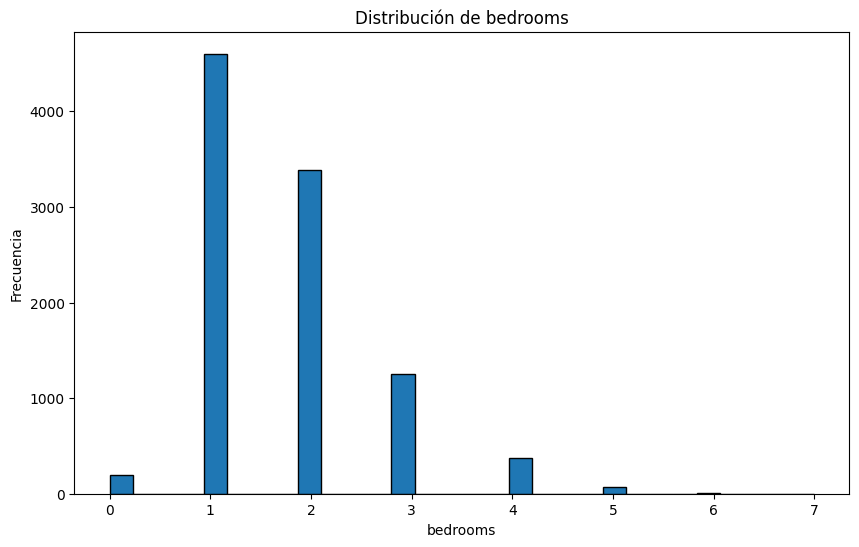

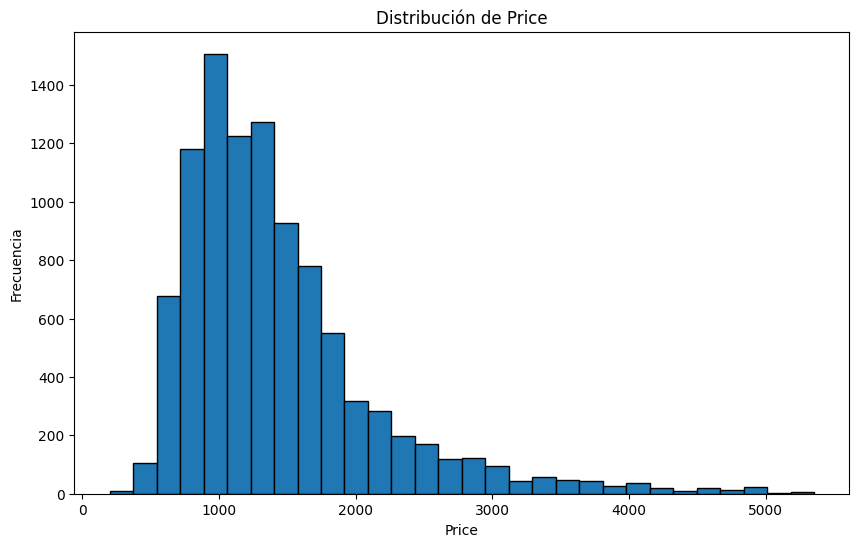

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(data_filtered_6['square_feet'], bins=30, edgecolor='k')
plt.title('Distribución de square_feet')
plt.xlabel('square_feet')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(data_filtered_6['bathrooms'], bins=30, edgecolor='k')
plt.title('Distribución de bathrooms')
plt.xlabel('bathrooms')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(data_filtered_6['bedrooms'], bins=30, edgecolor='k')
plt.title('Distribución de bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(data_filtered_6['price'], bins=30, edgecolor='k')
plt.title('Distribución de Price')
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.show()

In [24]:
data_filtered_6['price'].describe()

count    9888.000000
mean     1427.674656
std       717.265597
min       200.000000
25%       945.000000
50%      1261.000000
75%      1684.250000
max      5355.000000
Name: price, dtype: float64

### 3.5 Limpieza variables con frases

Se decidio quitar title dado que no se considera que el titulo de una residencia influya en su precio. Por otro lado, la columna body se decidio caracterizar poniendo la cantidad de letras que tiene para analizar esto y no lo que dice en body.

In [25]:
data_filtered_7 = data_filtered_6.copy()
data_filtered_7['Conteo body'] = [len(x) if pd.notnull(x) else 0 for x in data_filtered_7['body']]
data_filtered_7.drop(columns=['title', 'body'], inplace=True)
data_filtered_7.head(2)

,category,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,square_feet,address,cityname,state,latitude,longitude,source,Conteo body
0,housing/rent/apartment,NaN,1.0,0.0,Thumbnail,Desconocido,790,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,183
1,housing/rent/apartment,NaN,1.0,1.0,Thumbnail,Desconocido,425,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,154


Como se puede observar, en un conjunto de datos de 10,000 registros, las variables *address* y *amenities* presentan un alto porcentaje de valores nulos con un 33.49% y 33%. Además, estas variables son de tipo *object*, lo que dificulta su uso en modelos predictivos sin una transformación adecuada. Dado que su relación directa con el precio del arriendo no es clara y que su eliminación no afectará significativamente la calidad del análisis, se ha decidido descartarla para optimizar el procesamiento de los datos y evitar sesgos derivados de imputaciones innecesarias.

In [26]:
data_filtered_7.isnull().sum() /data_filtered_7.shape[0] * 100
variables_con_nulos = data_filtered_7.columns[data_filtered_7.isnull().sum() > 0]
nulos_df = pd.DataFrame({
    'Cantidad de Nulos': data_filtered_7.isnull().sum()[variables_con_nulos],
    'Porcentaje de Nulos': data_filtered_7.isnull().sum()[variables_con_nulos] / data_filtered_7.shape[0] * 100,
    'Tipo de Dato': data_filtered_7.dtypes[variables_con_nulos]
})
nulos_df

,Cantidad de Nulos,Porcentaje de Nulos,Tipo de Dato
amenities,3473,35.123382,object
address,3312,33.495146,object


In [27]:
data_filtered_8 = data_filtered_7.copy()
data_filterede_8 = data_filtered_8.drop(columns=['address', 'amenities'], inplace=True)


### 3.6 Eliminar los valores duplicados

Se eliminan los valores duplicados para garantizar la integridad de los datos y prevenir inconsistencias en el modelo.

In [28]:
data_filtered_9 = data_filtered_8.copy()
filas_antes = data_filtered_9.shape[0]
data_filtered_9 = data_filtered_9.drop_duplicates()
filas_despues = data_filtered_9.shape[0]
duplicados_eliminados = filas_antes - filas_despues
print(f"Cantidad de valores duplicados eliminados: {duplicados_eliminados}")



Cantidad de valores duplicados eliminados: 35


# 4. Crear Dummies 

Se crearon variables dummies para transformar las columnas categóricas en valores numéricos, permitiendo su uso en modelos de análisis y predicción. Al convertir cada categoría en una variable binaria, se facilita la interpretación de los datos y se evitan problemas con algoritmos que no manejan variables categóricas de forma nativa. Por otra parte, se utilizó `drop_first=True` para evitar la multicolinealidad en modelos lineales, asegurando un análisis más robusto y preciso.

In [29]:
data_filtered_9.head(3)

,category,bathrooms,bedrooms,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,Conteo body
0,housing/rent/apartment,1.0,0.0,Thumbnail,Desconocido,790,101,Washington,DC,38.9057,-76.9861,RentLingo,183
1,housing/rent/apartment,1.0,1.0,Thumbnail,Desconocido,425,106,Evansville,IN,37.9680,-87.6621,RentLingo,154
2,housing/rent/apartment,1.0,0.0,Thumbnail,Desconocido,1390,107,Arlington,VA,38.8910,-77.0816,RentLingo,164


In [30]:
import pandas as pd

data_filtered_9_dummies = pd.get_dummies(data_filtered_9, drop_first=True)
data_filtered_9_dummies.shape

(9853, 1635)

# Fuentes de Modelización

## 5. Dividir los datos para entrenar y test

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [32]:
X = data_filtered_9_dummies.copy()
X.drop(columns=['price'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, data_filtered_9_dummies['price'], test_size=0.2, random_state=42, shuffle=True)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

sc = StandardScaler()
X_train_escalado = sc.fit_transform(X_train)
X_test_escalado = sc.transform(X_test)

## 5.1. Crear diferentes modelos y comparar su rendimiento

Para este caso se decidio probar 3 modelos, Random Forest, Gradient Boosting y la Regresión Lineal. Es importante mencionar que para el caso de regresión lineal se escalaron los datos, ya que este modelo se ve altamente afectado por la escala de los mismos. 

In [33]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Definir los modelos en pipelines
RandomForest = RandomForestRegressor(n_estimators=100, random_state=42)
GradientBoosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
RegresionLineal = LinearRegression()


RandomForest.fit(X_train, y_train)
GradientBoosting.fit(X_train, y_train)
RegresionLineal.fit(X_train_escalado, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import numpy as np

# Lista de modelos
models = {
    "Random Forest": RandomForest,
    "Gradient Boosting": GradientBoosting,
    "Regresión Lineal": RegresionLineal
}

# Evaluar cada modelo
for name, model in models.items():
    print(f"\nEvaluación del modelo: {name}")
    if name == "Regresión Lineal":
        X_train_usado = X_train_escalado
        X_test_usado = X_test_escalado
    else:
        X_train_usado = X_train
        X_test_usado = X_test
    
    # Predicciones
    y_train_pred = model.predict(X_train_usado)
    y_test_pred = model.predict(X_test_usado)

    # Evaluación
    print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
    print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

    print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

    print("Train R²:", r2_score(y_train, y_train_pred))
    print("Test R²:", r2_score(y_test, y_test_pred))



Evaluación del modelo: Random Forest
Train MAE: 84.17144627300299
Test MAE: 229.99659413882242
Train RMSE: 132.41194892390445
Test RMSE: 361.0935847022848
Train R²: 0.9660330550591724
Test R²: 0.7454272453970844

Evaluación del modelo: Gradient Boosting
Train MAE: 266.2355842340431
Test MAE: 282.2968969686646
Train RMSE: 370.61710316107565
Test RMSE: 407.97263143148064
Train R²: 0.733894993194999
Test R²: 0.6750366105233525

Evaluación del modelo: Regresión Lineal
Train MAE: 207.01714286738166
Test MAE: 272.5019051316498
Train RMSE: 317.09987066004186
Test RMSE: 405.13936350301725
Train R²: 0.8051976187494618
Test R²: 0.6795345166768083


In [43]:
data_filtered_9_dummies['price'].describe()

count    9853.000000
mean     1427.800873
std       717.962298
min       200.000000
25%       945.000000
50%      1260.000000
75%      1683.000000
max      5355.000000
Name: price, dtype: float64

In [44]:
from sklearn.model_selection import KFold 
# Fijemos el número de particiones. Utilizaremos K = 3.
particiones_Random_Forest = KFold(n_splits=3, shuffle=True, random_state = 0)

In [45]:
param_grid_random_forest = {
    'n_estimators': [50, 100, 200],  # Número de árboles
    'max_depth': [None, 10, 20],  # Profundidad máxima del árbol
}


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split,GridSearchCV

RandomForest = RandomForest(random_state=42)

# Ahora utilizamos GridSearch sobre el grid y particiones definidas
mejor_modelo_random_forest = GridSearchCV(RandomForest, param_grid_random_forest, cv=particiones_Random_Forest, n_jobs=-1)

# Ajuste del modelo
mejor_modelo_random_forest.fit(X_train, y_train)
# Podemos ver cuál fue el resultado de la búsqueda (mejores valores de hiperparámetros)
mejor_modelo_random_forest.best_params_


{'max_depth': None, 'n_estimators': 200}

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# Predicciones
Random_Forest_Mejor = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42)

Random_Forest_Mejor.fit(X_train, y_train)

y_train_pred = Random_Forest_Mejor.predict(X_train)
y_test_pred = Random_Forest_Mejor.predict(X_test)

# Evaluación
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

Train MAE: 83.48455439508545
Test MAE: 229.4213349218429
Train RMSE: 129.7973077763047
Test RMSE: 360.0168668738754
Train R²: 0.9673612512872088
Test R²: 0.7469431646573435


## 5.2 Crear el modelo definitivo con todos los datos

Una vez visto que el modelo de Random Forest presenta un mejor poder predictivo tanto al tener el menor MSE y RMSE tambien presenta el mayor R². Se decidio utilizar este modelo para la presentación

Se crea un filtro de datos para recibir los datos naturales y pasarlos a los datos de entrada del modelo

In [34]:
import pandas as pd

def FiltrarDatos(df, data_filtered):
    if df.shape[0] > 1:
        return pd.get_dummies(df, drop_first=True)
    
    elif df.shape[0] == 1:
        # Concatenar con data_filtered para garantizar la presencia de todas las categorías
        todos = pd.concat([df, data_filtered], ignore_index=True)
        
        todos = pd.get_dummies(todos, drop_first=True)
        
        # Asegurar que el orden de las columnas sea el mismo que en data_filtered
        todos = todos.reindex(columns=pd.get_dummies(data_filtered, drop_first=True).columns, fill_value=0)
        
        # Retornar solo la primera fila con las columnas en el orden correcto
        return todos.iloc[[0]]


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from functools import partial
import numpy as np

data_filtro = data_filtered_9.copy()
data_filtro = data_filtro.drop(columns=['price'])
FiltrarDatosTransform = FunctionTransformer(partial(FiltrarDatos, data_filtered=data_filtro))

RandomForestCompleto = Pipeline([
    ("filtrar", FiltrarDatosTransform), 
    ('model', RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42))  
])

In [36]:
X = data_filtered_9.copy()
Y = data_filtered_9['price']
X = X.drop(columns=['price']) 

RandomForestCompleto.fit(X, Y)

Pipeline(steps=[('filtrar',
                 FunctionTransformer(func=functools.partial(<function FiltrarDatos at 0x0000020BB143EF20>, data_filtered=                    category  bathrooms  bedrooms  has_photo pets_allowed  \
0     housing/rent/apartment        1.0       0.0  Thumbnail  Desconocido   
1     housing/rent/apartment        1.0       1.0  Thumbnail  Desconocido   
2     housing/rent/apartment        1.0       0.0  Thumbnail  Desconocido   
3     housing/rent/apartment        1.0       0.0...
9941         3280        Charleston    WV   38.3650   -81.6468     RentLingo   
9942         3325  Colorado Springs    CO   38.9577  -104.7566  RentDigs.com   
9944         3350     Mission Viejo    CA   33.6042  -117.6526     RentLingo   
9999          880     Lawrenceville    GA   34.0072   -84.0034  RentDigs.com   

      Conteo body  
0             183  
1             154  
2             164  
3             132  
4             163  
...           ...  
9940          136  
9941          144  
9942          212  
9944          149  
9999         1016  

[9853 rows x 12 columns]))),
                ('model',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

# 6. Importar datos limpios y Pipeline del modelo

In [37]:
data_filtered_9.to_csv('datos_limpios.csv', index=False) #
print("Guardando el DataFrame filtrado en un archivo CSV llamado 'datos_limpios.csv'")

Guardando el DataFrame filtrado en un archivo CSV llamado 'datos_limpios.csv'


In [38]:
from joblib import dump
# Exportar el pipeline entrenado en formato .joblib
dump(RandomForestCompleto, "RandomForestCompleto.joblib")
print("El pipeline ha sido exportado como 'RandomForestCompleto.joblib' en el directorio actual")

El pipeline ha sido exportado como 'RandomForestCompleto.joblib' en el directorio actual


In [39]:
def mostrar_categorias(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):  # Verifica si es numérica
            continue  # Si es numérica, la salta
        
        unique_values = df[col].nunique()
        print(f"La columna '{col}' tiene {unique_values} valores únicos.")
    
    print("-" * 40)

# Uso de la función
mostrar_categorias(data_filtered_9)

La columna 'category' tiene 3 valores únicos.
La columna 'has_photo' tiene 3 valores únicos.
La columna 'pets_allowed' tiene 4 valores únicos.
La columna 'cityname' tiene 1560 valores únicos.
La columna 'state' tiene 52 valores únicos.
La columna 'source' tiene 12 valores únicos.
----------------------------------------


### Ejemplo de Uso Pipeline para solo una predicción

In [40]:
from joblib import dump, load

loaded_pipeline = load("RandomForestCompleto.joblib")

data = {
    "category": ["housing/rent/apartment"],
    "bathrooms": [1.0],
    "bedrooms": [1.0],
    "has_photo": ["Thumbnail"],
    "pets_allowed": ["Cats,Dogs"],
    "square_feet": [515],
    "cityname": ["Houston"],
    "state": ["TX"],
    "latitude": [29.7714],
    "longitude": [-95.4343],
    "source": ["RentLingo"],
    "Conteo body": [476]
}

df = pd.DataFrame(data)  # Convertir el diccionario en un DataFrame
prediction = loaded_pipeline.predict(df)  # Hacer la predicción
prediction


array([686.8875])